# Análise de Internações no Sistema de Saúde Brasileiro - Data Science Project

---



Que tipo de estratégia você sugeriria para diminuir o número de internações em hospitais do SUS? E para o Estado
de São Paulo? Quais especificidades deveriam ser levadas em conta? Iremos responder essas e outras perguntas utilizando uma base de dados processada pelo DATASUS.

O Sistema único de Saúde (SUS) que passou a oferecer a todo cidadão brasileiro acesso gratuito a serviços de saúde. É uma conquista do povo brasileiro, garantido pela Constituição Federal de 1988.

Considerado um dos maiores sistemas de saúde públicos do mundo, o SUS beneficia cerca de 190 milhões de pessoas, sendo que 80% delas dependem exclusivamente dele para qualquer atendimento de saúde.

Os desafios, no entanto, são muitos, cabendo ao Governo e à sociedade civil a atenção para estratégias de solução de diversos problemas, identificados por exemplo na gestão do sistema e também no subfinancimento da saúde (falta de recursos).

In [ ]:
#@title
from IPython.display import Image
Image(url='https://media.giphy.com/media/elUVD4TyYlGuX3RwI6/giphy.gif')

**Sobre os dados**

---



Esse estudo estará utilizando dados oriundos do Sistema de Informações Hospitalares do SUS - SIH/SUS, gerido pelo Ministério da Saúde, através da Secretaria de Assistência à Saúde, em conjunto com as Secretarias Estaduais de Saúde e as Secretarias Municipais de Saúde, sendo processado pelo DATASUS - Departamento de Informática do SUS, da Secretaria Executiva do Ministério da Saúde.

Com base nas informações dispostas nesse conjunto de dados, irei trabalhar no tratamento, transformação e análise dos dados contidos, assim como treinar um modelo de machine learning, relatar informações e insights acerca do número de internações no
sistema de saúde brasileiro.



**Perguntas a serem respondidas**

---



Dentre alguns dos questionamentos que podem ser gerados com estes dados, tenho interesse em saber a resposta para as seguintes perguntas:

- Em relação a São Paulo, como está a relação de Quantidade de internações por período?
- Qual estado apresenta a maior taxa de mortalidade? E o que isso tem relação com a quantidade de óbitos?
- Quanto mais dias de internação, maior é o valor dos serviços hospitalares?
- Analisando o Brasil todo, tivemos a mesma quantidade de internações e de AIH por período?



**Dicionário de dados**

---



Para facilitar o entendimento a qualquer leitor, irei colocar o significado das variáveis:

***month*** = Ano e mês.

***Região/Unidade da Federação*** = Estados do Brasil.

***Internações*** = Qtd de internações.

***AIH_aprovadas*** = Quantidade de AIH aprovadas no período, tanto de novas internações como de prorrogação.

***Valor_total*** = Valor referente às AIH aprovadas no período.

***Valor_serviços_hospitalares*** = Valor dos serviços hospitalares (SH) referente às AIH aprovadas no período.

***Val_serv_hosp_-_compl_federal*** = Valor dos serviços hospitalares (SH) - complemento federal - referente às AIH aprovadas no período.

***Val_serv_hosp_-_compl_gestor*** = Valor dos serviços hospitalares (SH) - complemento do gestor estadual ou municipal - referente às AIH aprovadas no período.

***Valor_serviços_profissionais*** = Valor dos serviços profissionais (SP) referente às AIH aprovadas no período.

***Val_serv_prof_-_compl_federal*** = Valor dos serviços profissionais (SP) - complemento federal - referente às AIH aprovadas no período.

***Val_serv_prof_-_compl_gestor*** = Valor dos serviços profissionais (SP) - complemento do gestor estadual ou municipal - referente às AIH aprovadas no período.

***Valor_médio_AIH*** = Valor médio das AIH aprovadas no período

***Valor_médio_intern*** = Valor médio das AIH aprovadas, computadas como internações, no período.

***Dias_permanência*** = Total de dias de internação referentes às AIH aprovadas no período. São contados os dias entre a baixa e a alta.

***Média_permanência*** = Média de permanência das internações referentes às AIH aprovadas, computadas como internações, no período.

***Óbitos*** = Quantidade de internações que tiveram alta por óbito, nas AIH aprovadas no período

***Taxa_mortalidade*** = Razão entre a quantidade de óbitos e o número de AIH aprovadas, computadas como internações, no período, multiplicada por 100.

**Primeiras impressões do nosso conjunto de dados**

---



Vale ressaltar que o conjunto de dados original está em um arquivo 'xlsx' e os períodos disponíveis estão segmentados por diversas abas, portanto realizei a transformação do arquivo, criando a coluna "month" para facilitar nossa análise dos dados e por fim deixei com a extensão 'csv'.

In [ ]:
#Importando os dados
import pandas as pd

df = pd.read_csv("case_internacao_sus.csv",sep=',', decimal='.')

In [ ]:
#Importando numpy e bibliotecas de visualização 
!pip install sweetviz
import numpy as np #algebra
import seaborn as sns #gráficos
import plotly.express as px #gráficos
import sweetviz as sv # Visualização do conjunto de dados
import matplotlib.pyplot as plt #plotagem
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
df.head(10) #Visualização das 10 primeiras linhas do dataset

,month,Região/Unidade da Federação,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade
0,2017/12,Rondônia,9783,9783,7507845.13,5931386.18,-,-,1576458.95,-,-,767.44,767.44,42043,4.3,235,2.40
1,2017/12,Acre,3463,3487,2610454.55,1966308.65,-,-,644145.90,-,-,748.62,753.81,16660,4.8,106,3.06
2,2017/12,Amazonas,14337,14337,13169660.32,10020114.86,-,-,3149545.46,-,-,918.58,918.58,72629,5.1,403,2.81
3,2017/12,Roraima,3513,3513,2635287.45,1986327.47,-,-,648959.98,-,-,750.15,750.15,18231,5.2,87,2.48
4,2017/12,Pará,40967,40967,34426413.15,25709880.70,524012.6,1100.81,7940611.55,1100.81,586.51,840.34,840.34,167386,4.1,859,2.10
5,2017/12,Amapá,2493,2493,1716855.56,1220961.05,-,-,495894.51,-,-,688.67,688.67,12648,5.1,71,2.85
6,2017/12,Tocantins,5803,5803,5200789.02,3895438.71,37192.97,-,1244761.64,-,-,896.22,896.22,28698,4.9,168,2.90
7,2017/12,Maranhão,38308,38779,29435501.73,22750968.14,164515.06,24223.44,6423423.03,24223.44,-,759.06,768.39,173939,4.5,773,2.02
8,2017/12,Piauí,17763,17890,16048864.85,12460695.38,225084.77,-,3246692.34,-,-,897.09,903.50,83497,4.7,431,2.43
9,2017/12,Ceará,37661,38125,45509439.96,35745652.63,-,-,9763787.33,-,-,1193.69,1208.40,212341,5.6,1488,3.95


Acima temos as primeiras linhas do nosso case de internações do SUS.

Como podemos ver os valores missing estão representados por "-", então vamos transformar esses valores em "nan" para termos a visualização da quantidade de nulos.

In [ ]:
# Realizando a substituição dos valores "-" para missing
df = df.apply(lambda x: x.replace('-', np.nan))

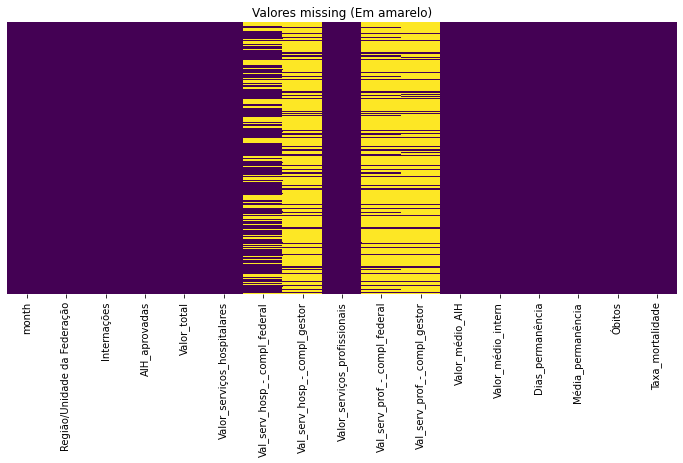

In [ ]:
# Plotagem dos valores missing (nulos)
plt.subplots(figsize=(12,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');
plt.title("Valores missing (Em amarelo)");

In [ ]:
df.info() #Informações sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   month                          377 non-null    object 
 1   Região/Unidade da Federação    377 non-null    object 
 2   Internações                    377 non-null    int64  
 3   AIH_aprovadas                  377 non-null    int64  
 4   Valor_total                    377 non-null    float64
 5   Valor_serviços_hospitalares    377 non-null    float64
 6   Val_serv_hosp_-_compl_federal  251 non-null    object 
 7   Val_serv_hosp_-_compl_gestor   72 non-null     object 
 8   Valor_serviços_profissionais   377 non-null    float64
 9   Val_serv_prof_-_compl_federal  72 non-null     object 
 10  Val_serv_prof_-_compl_gestor   62 non-null     object 
 11  Valor_médio_AIH                377 non-null    float64
 12  Valor_médio_intern             377 non-null    flo

                                             |          | [  0%]   00:00 -> (? left)


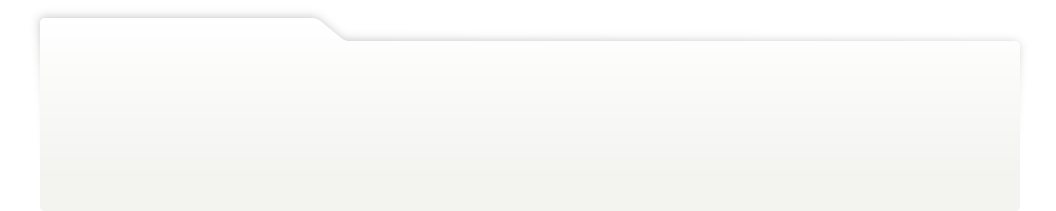
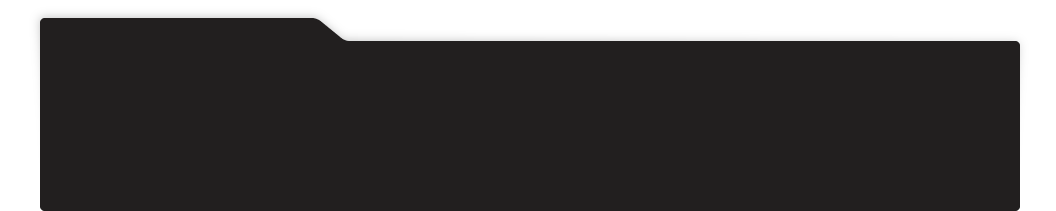
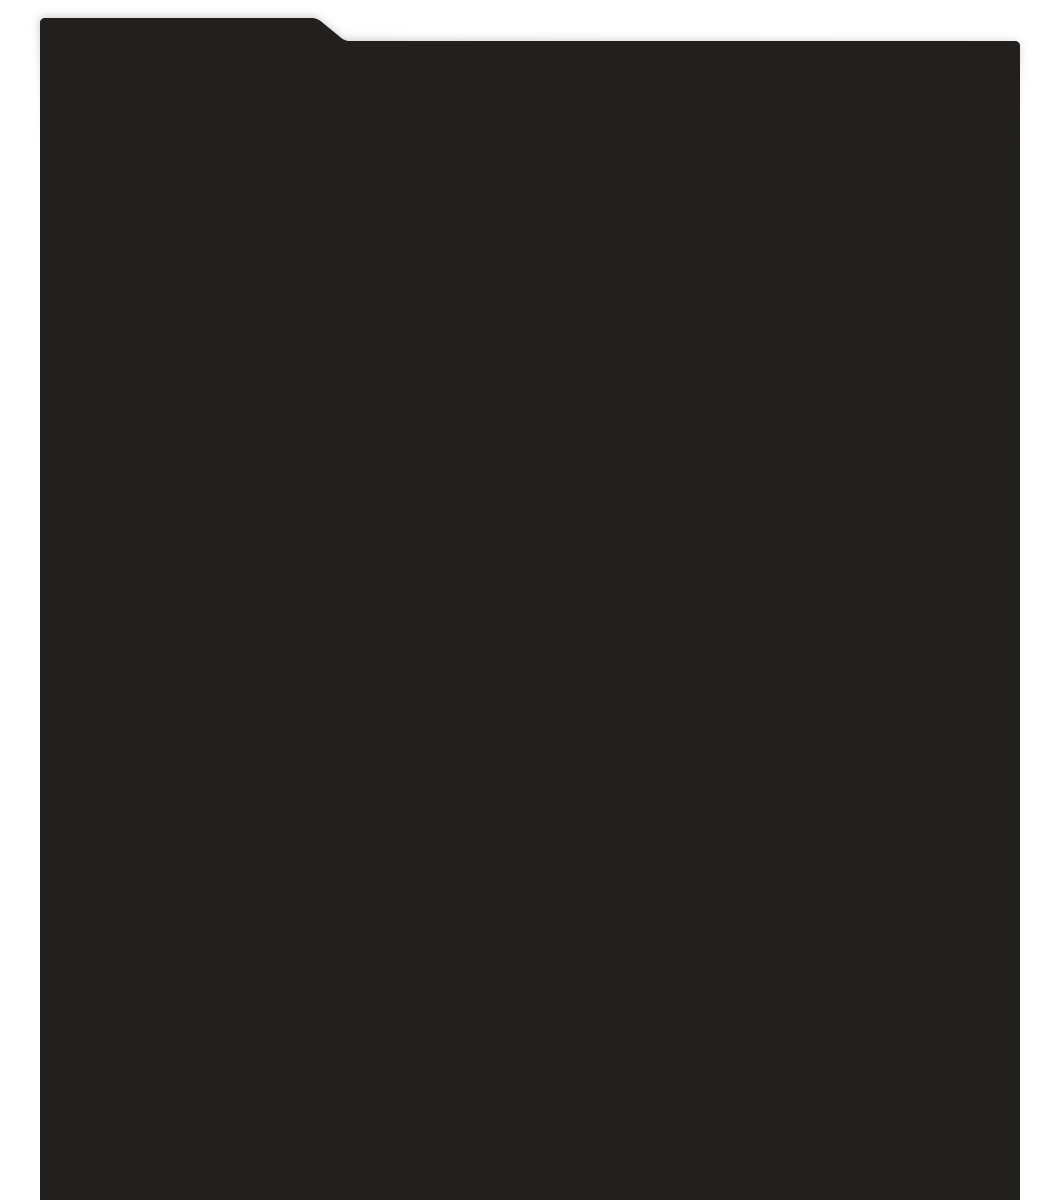
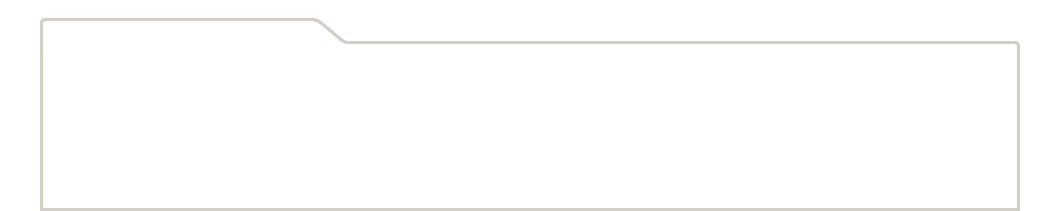
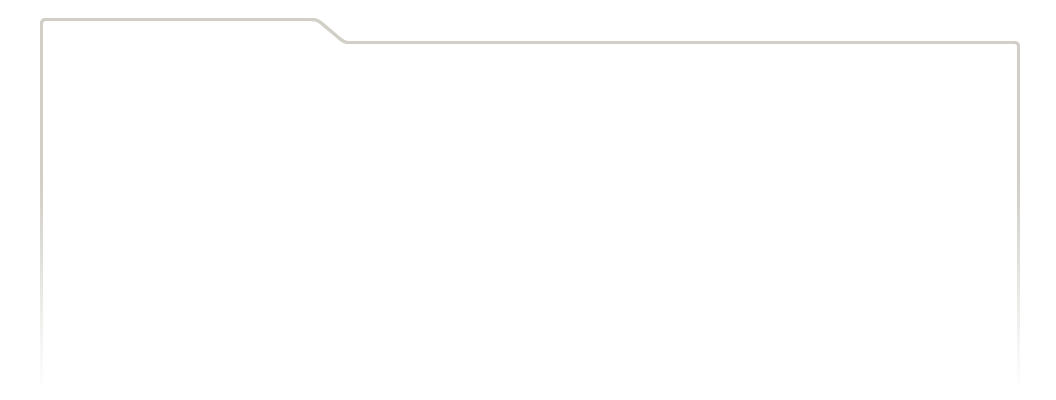
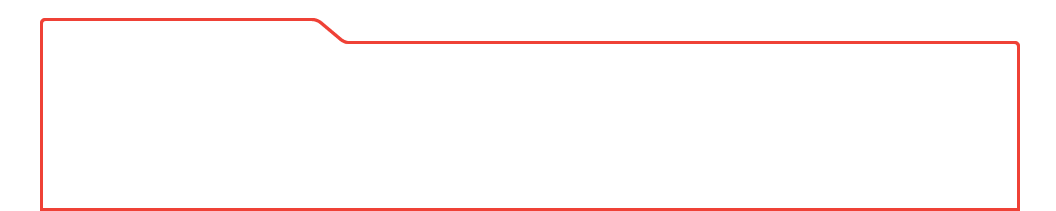
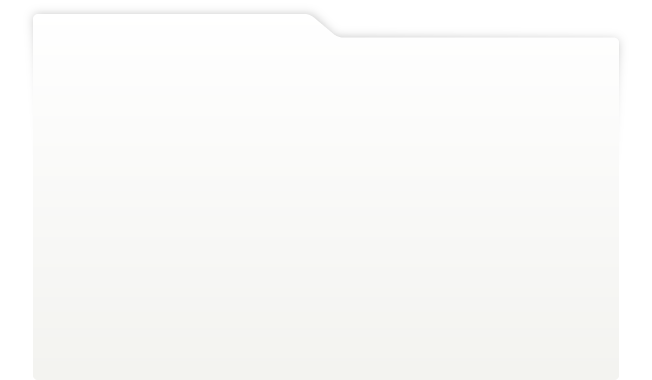
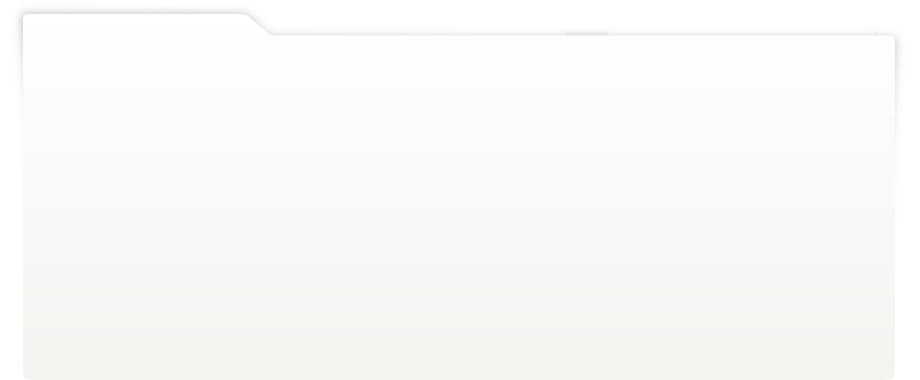
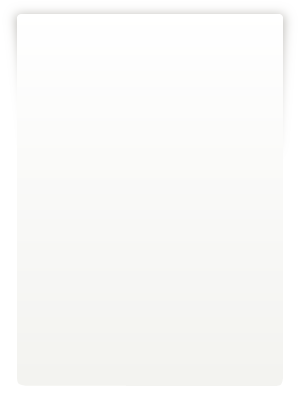
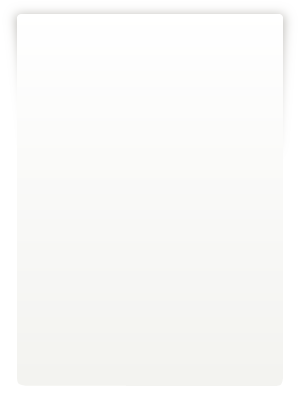
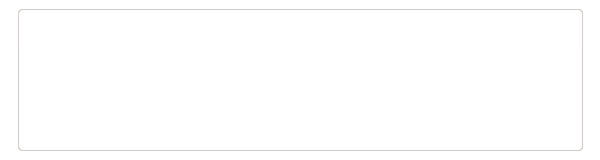
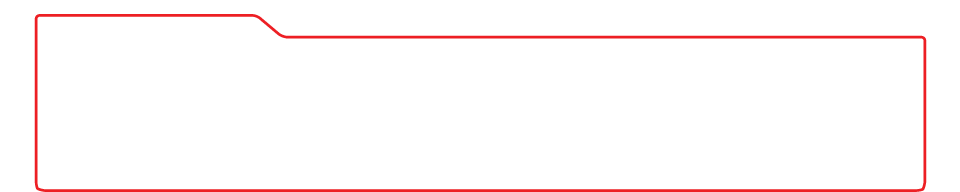
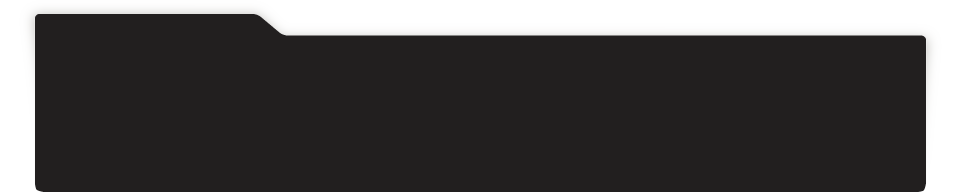
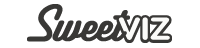
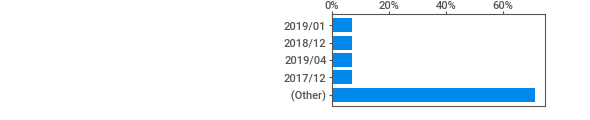
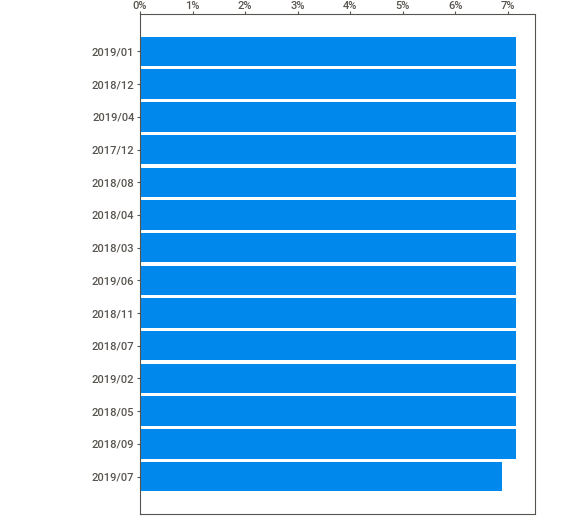
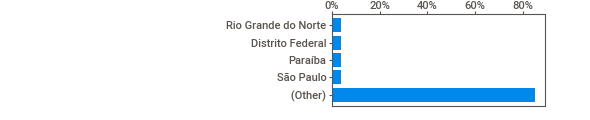
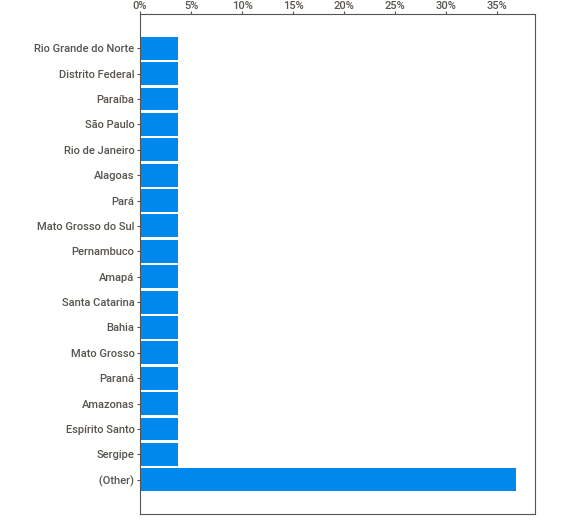
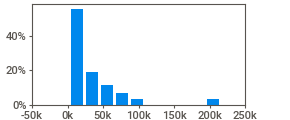
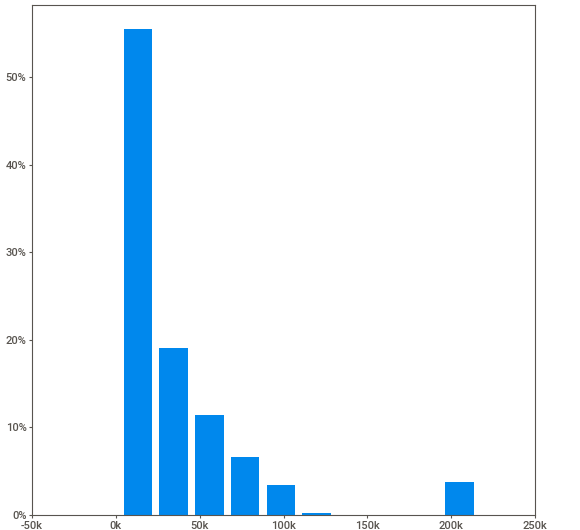
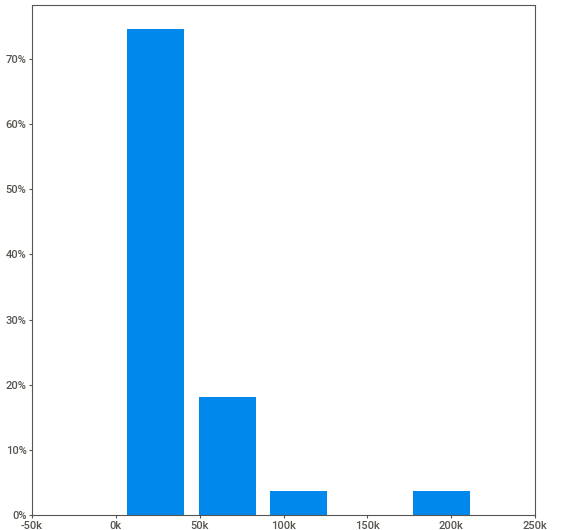
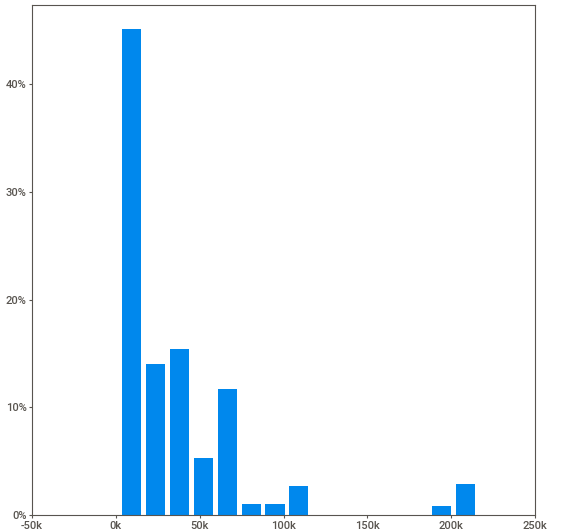
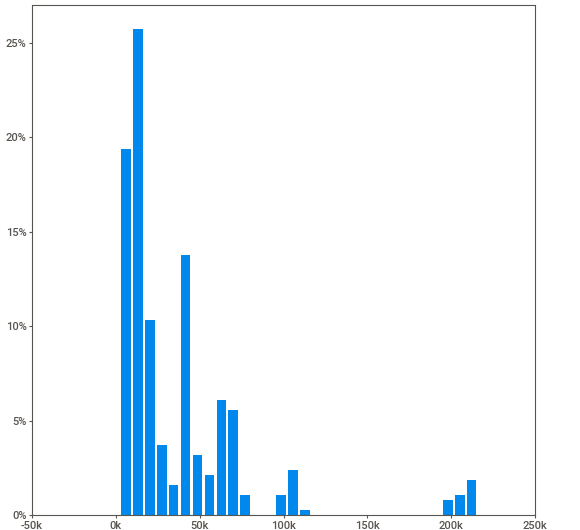
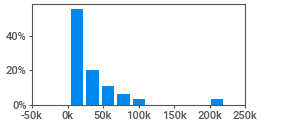
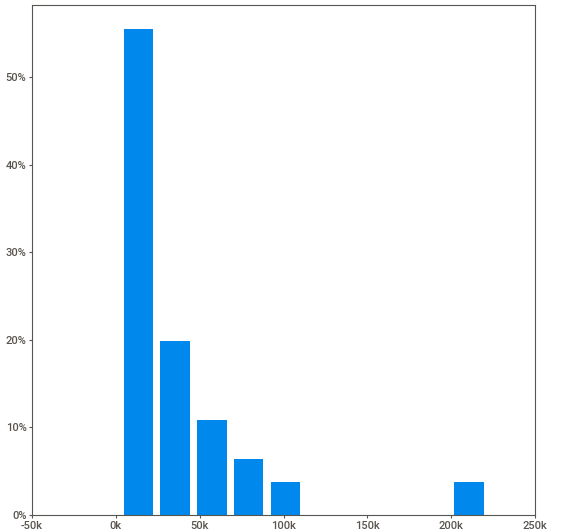
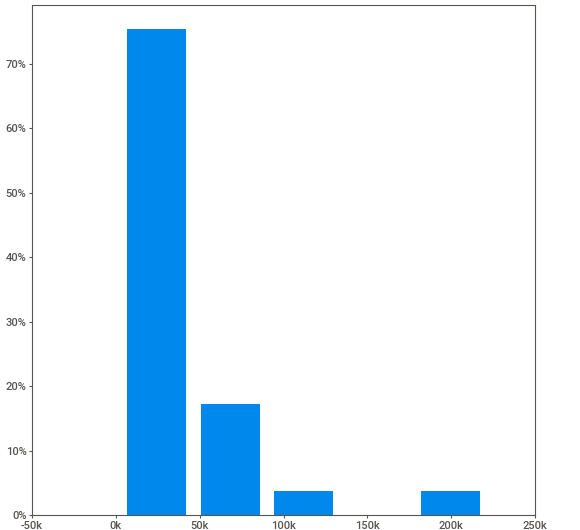
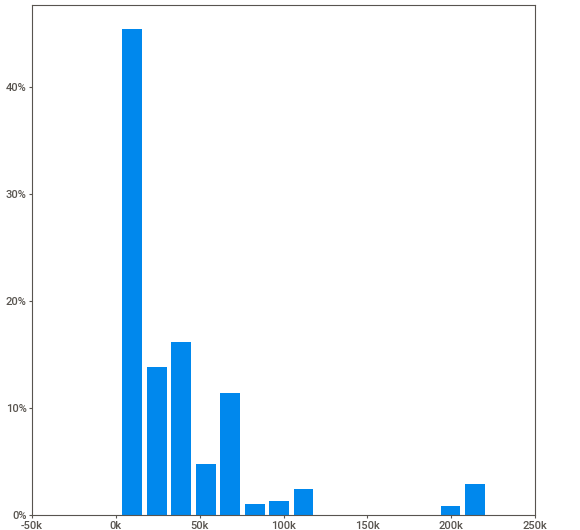
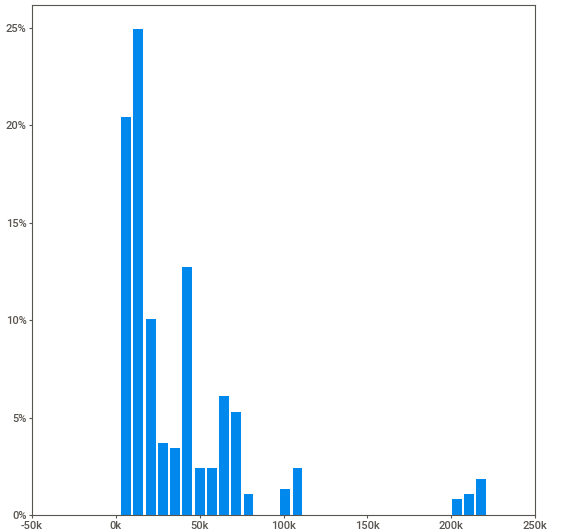
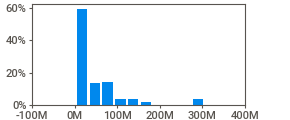
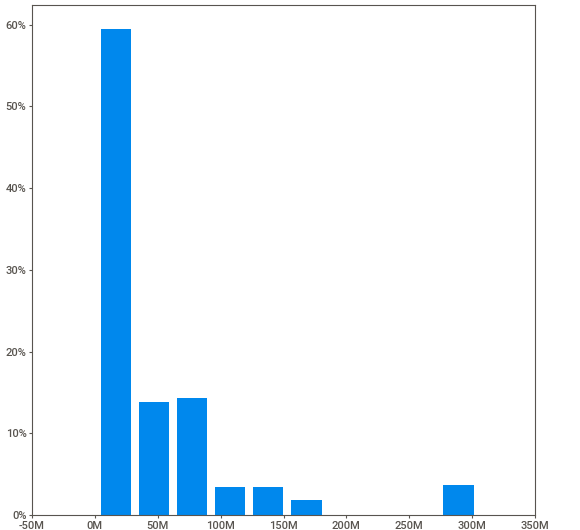
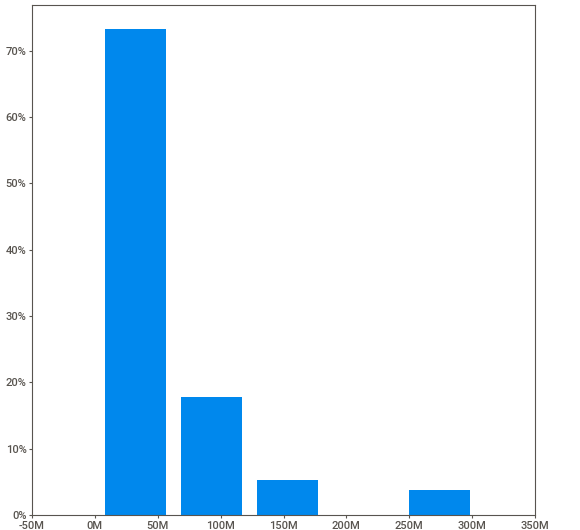
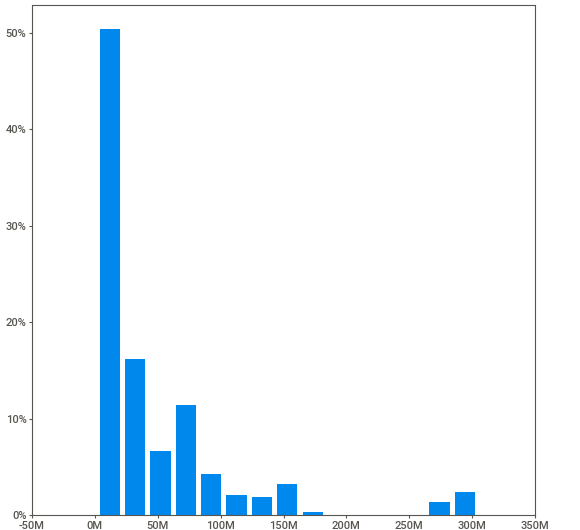
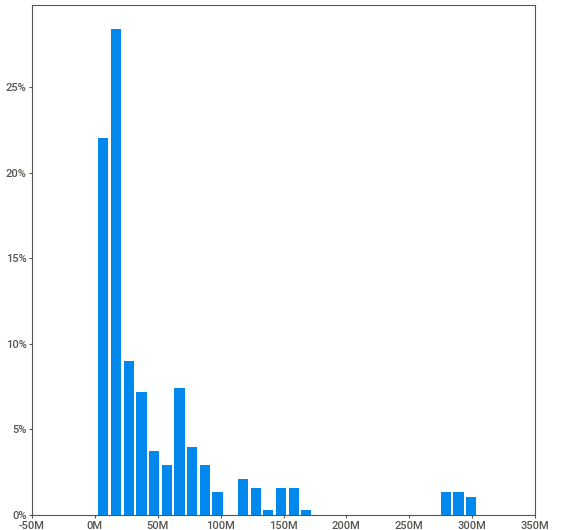
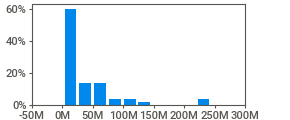
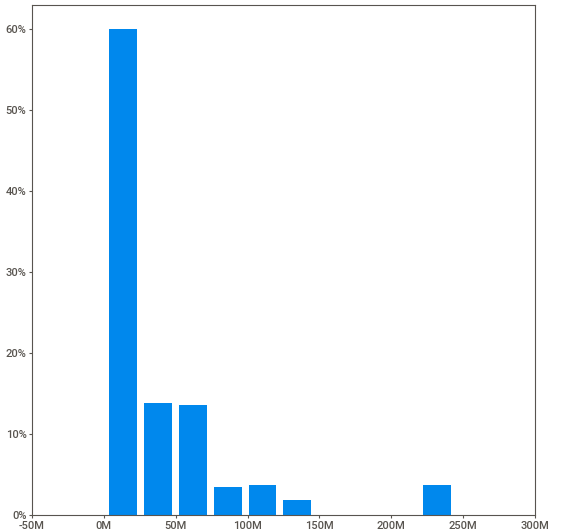
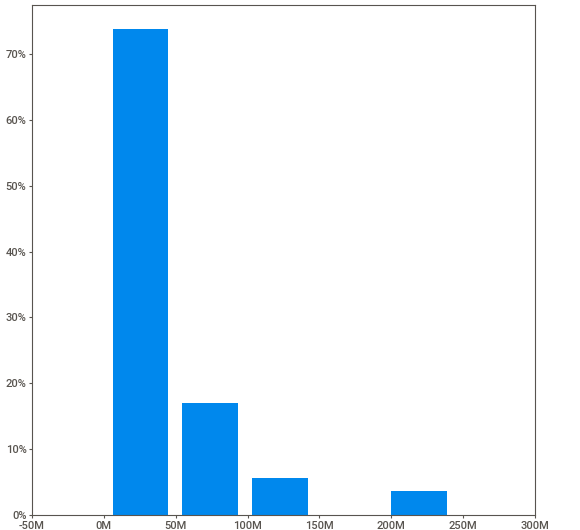
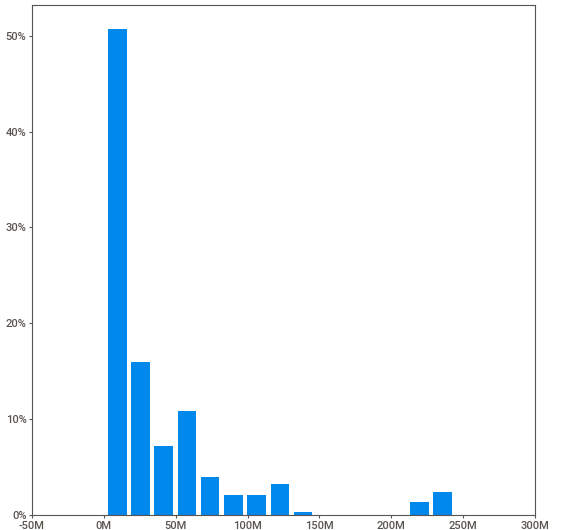
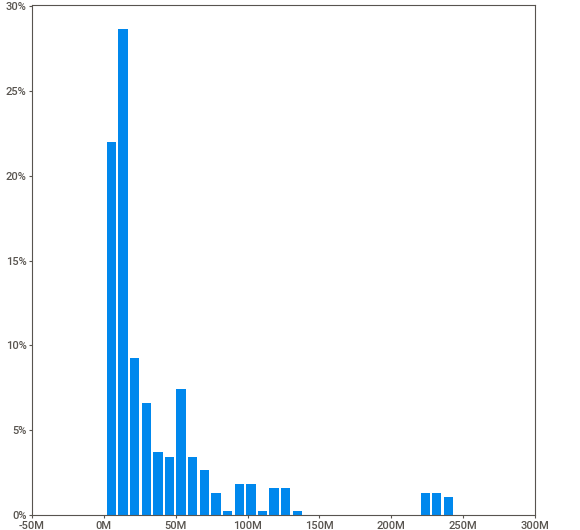
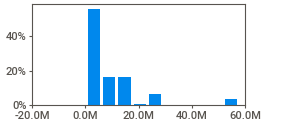
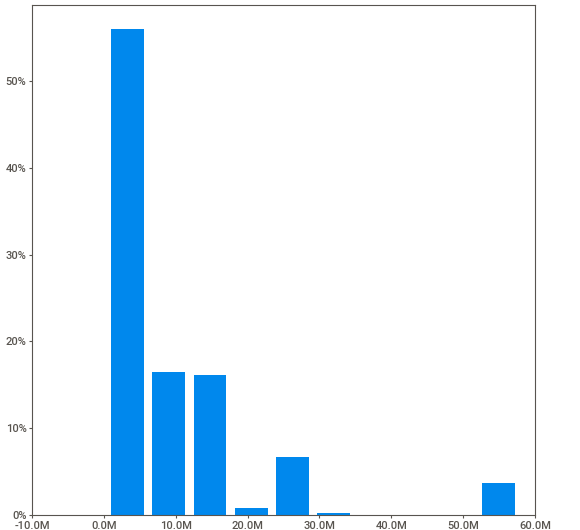
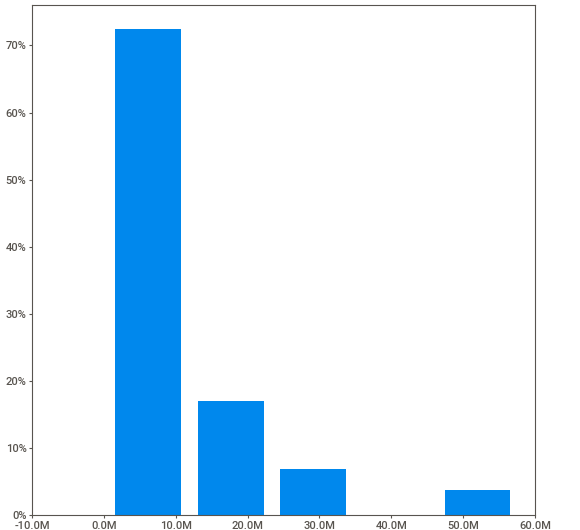
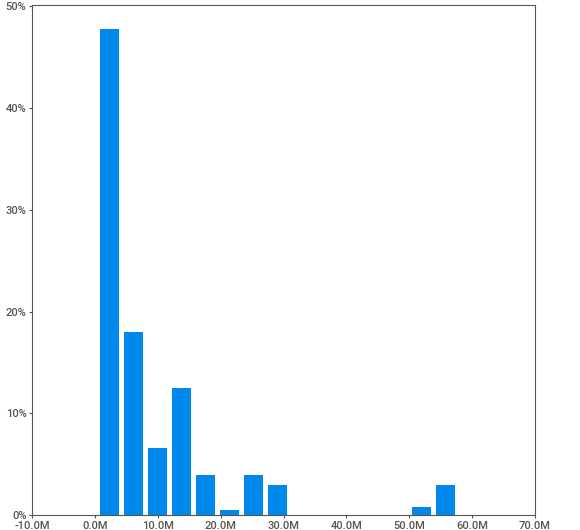
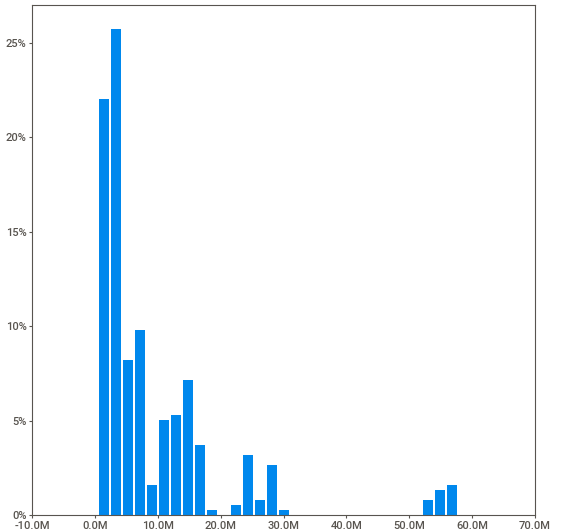
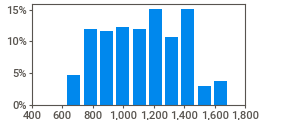
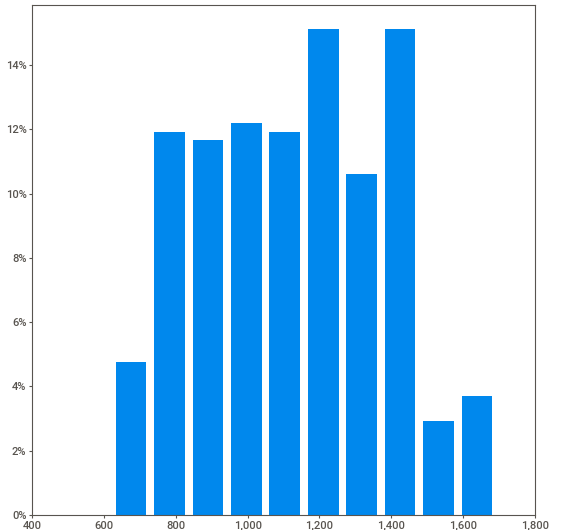
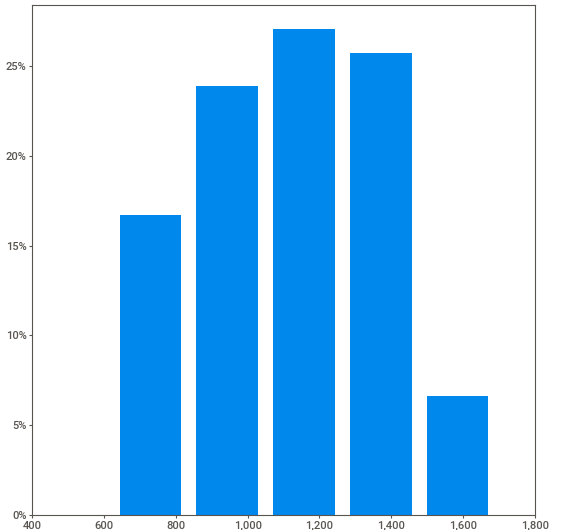
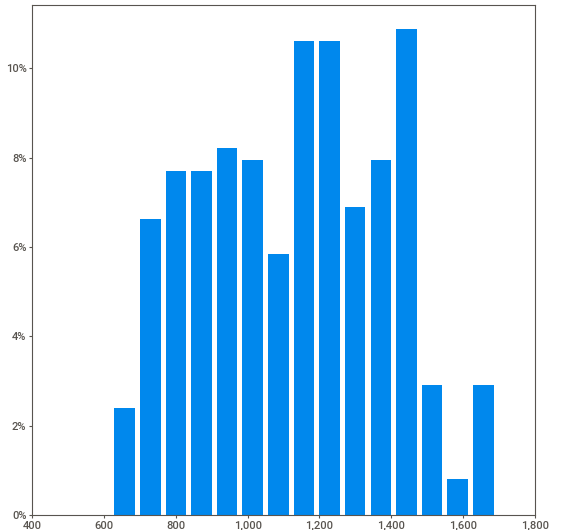
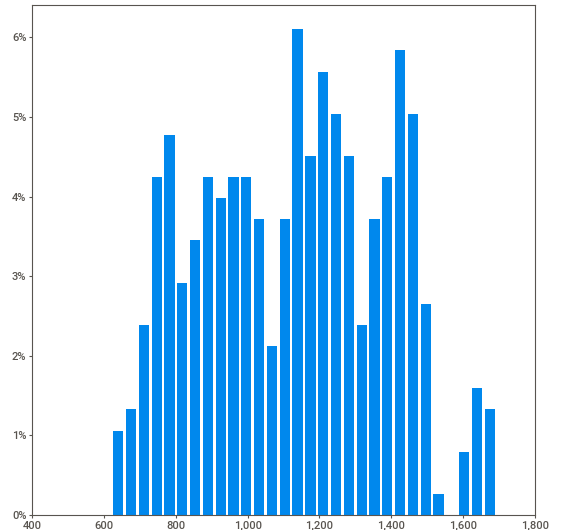
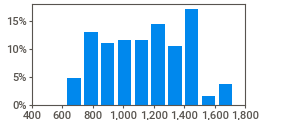
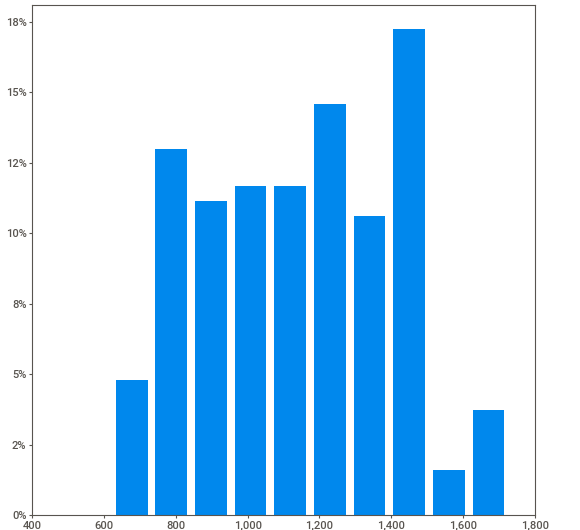
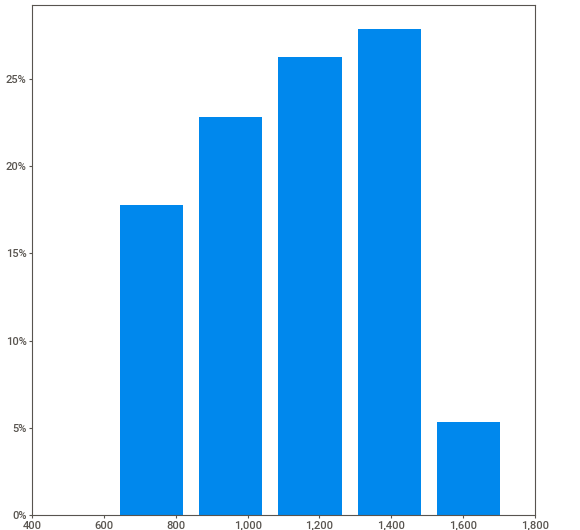
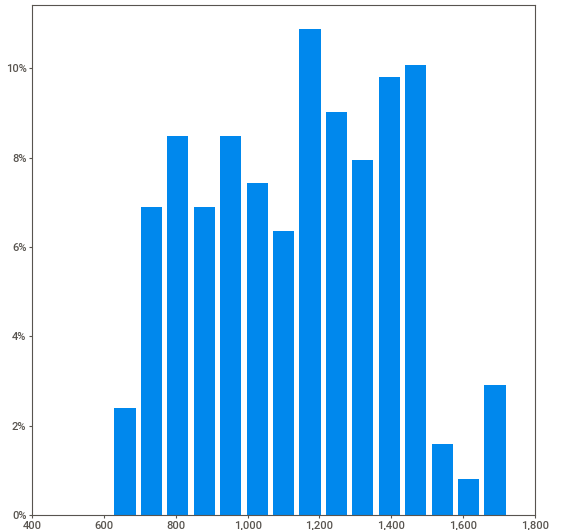
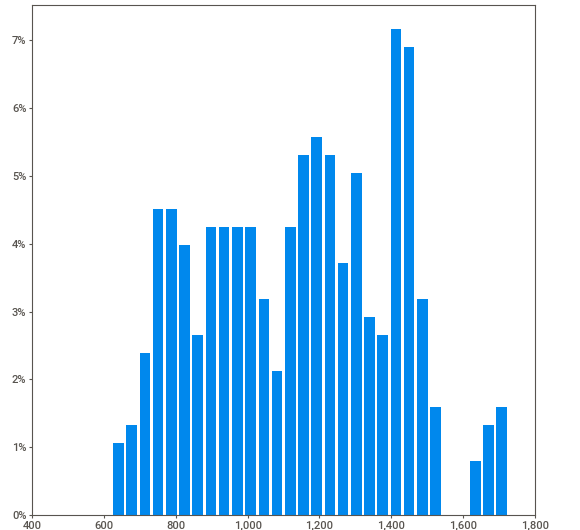
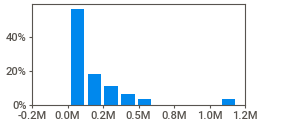
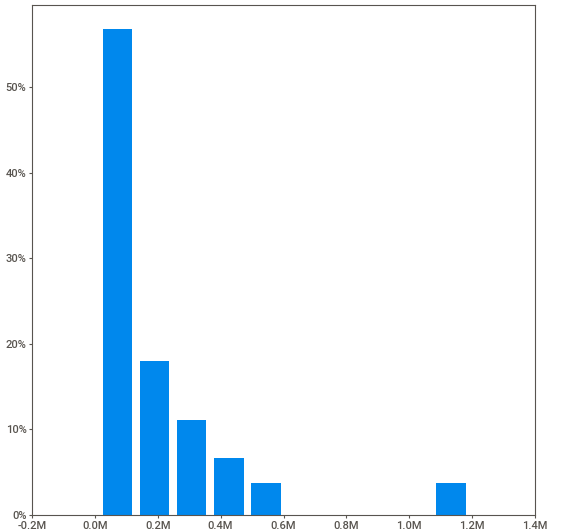
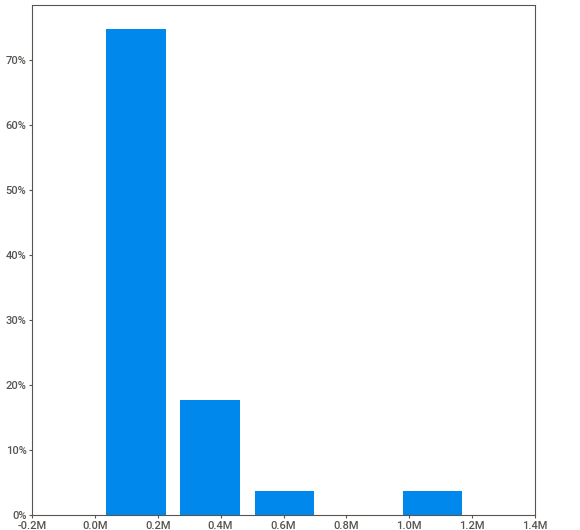
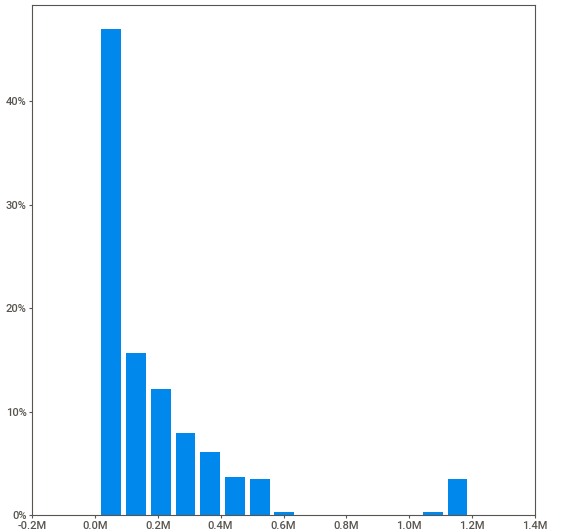
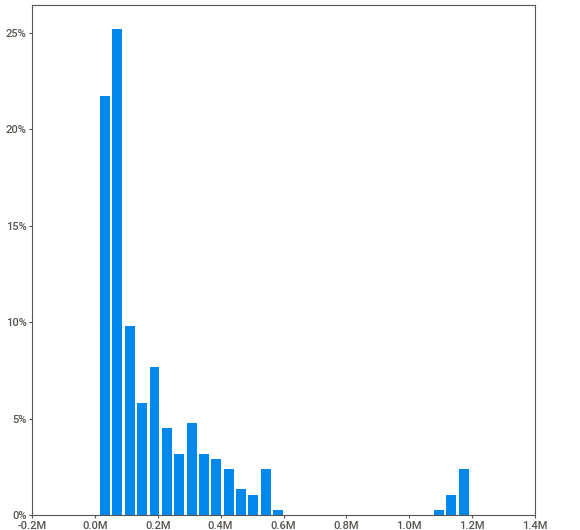
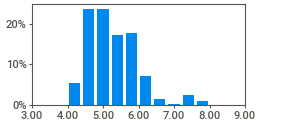
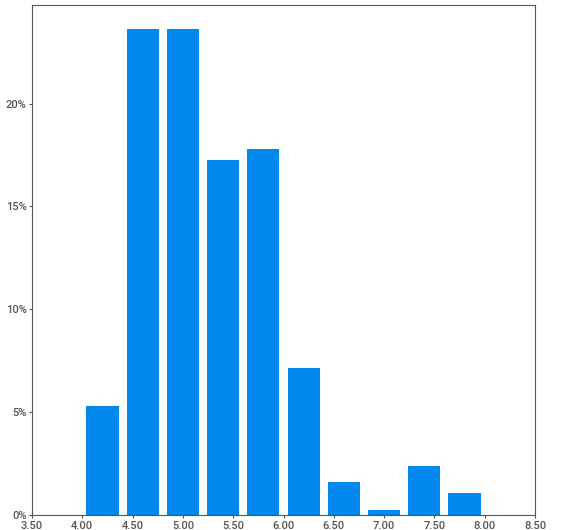
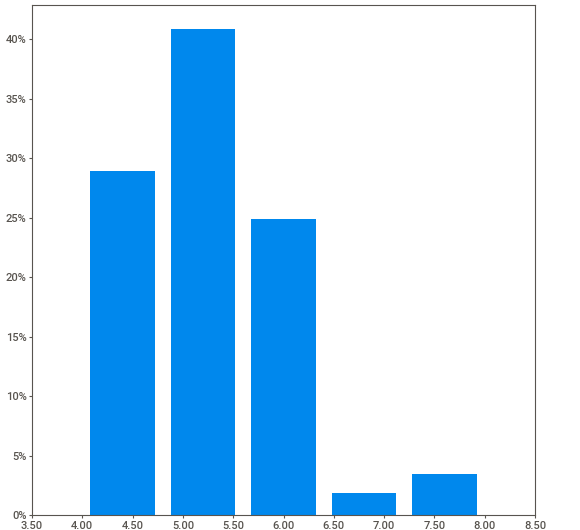
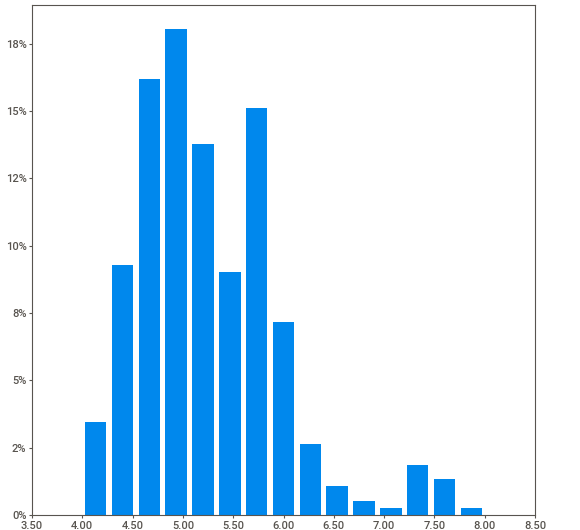
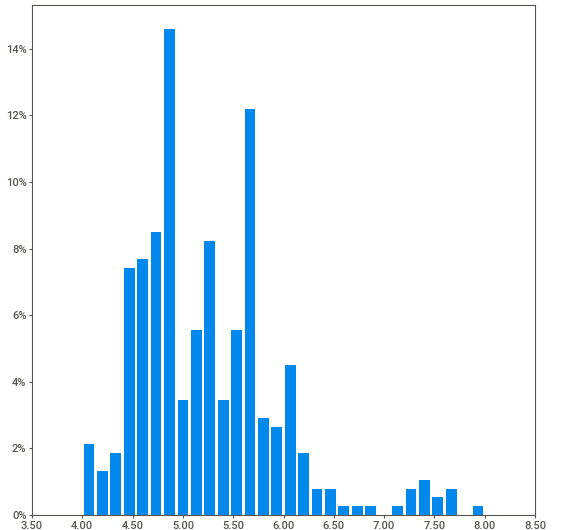
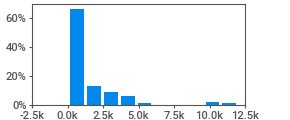
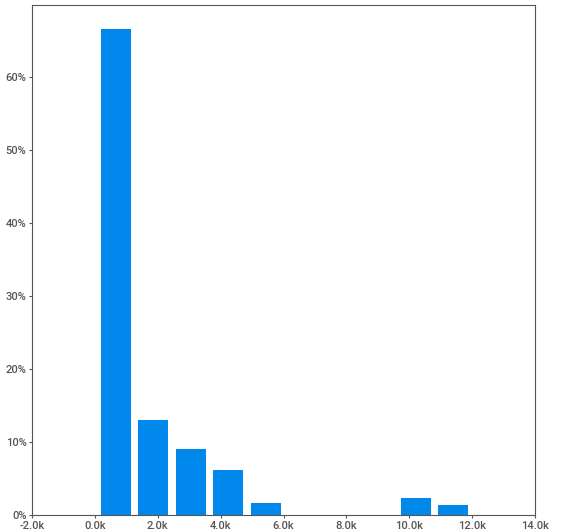
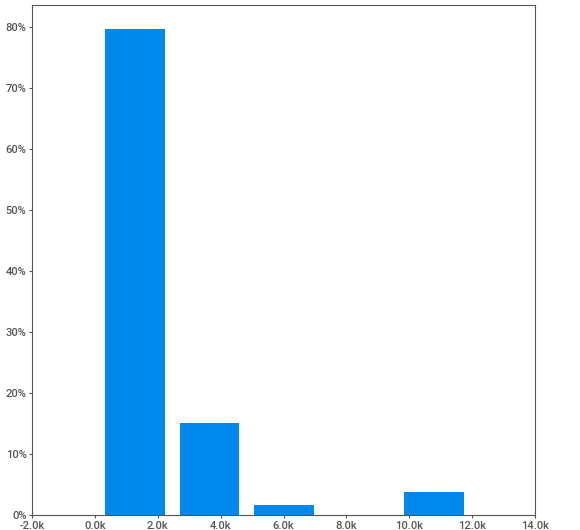
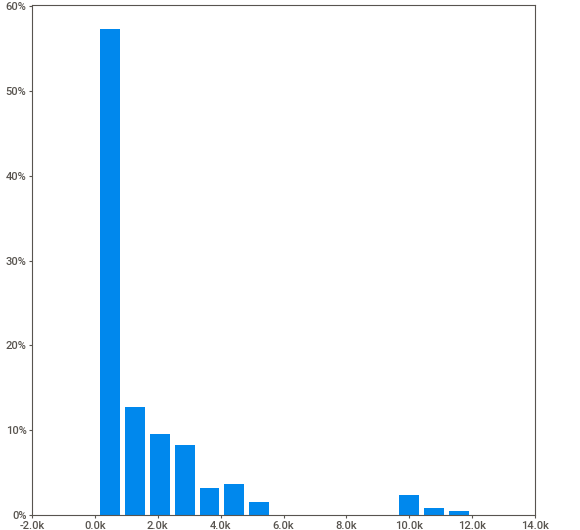
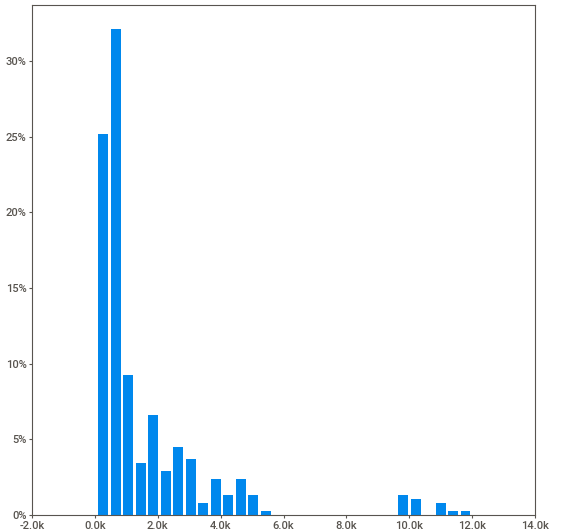
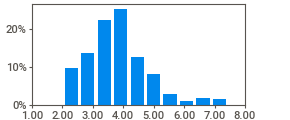
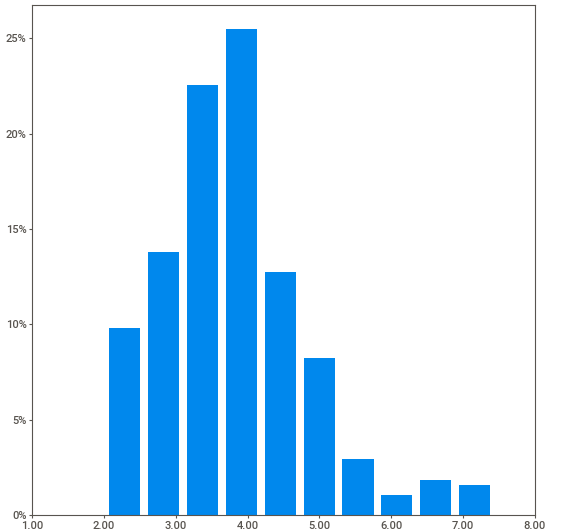
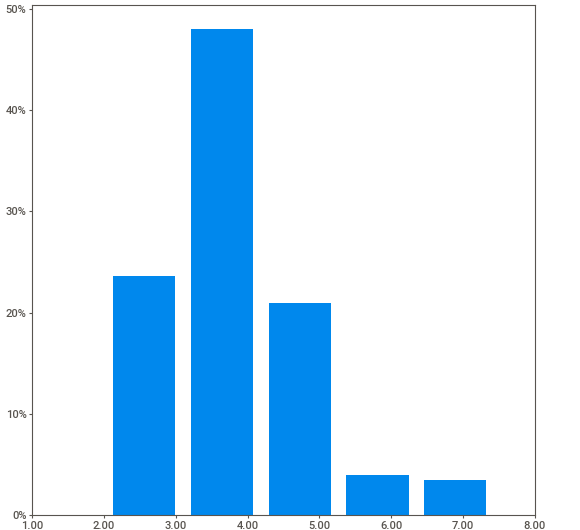
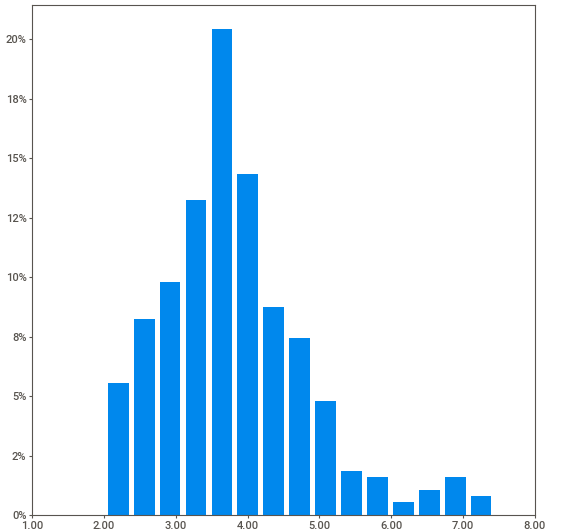
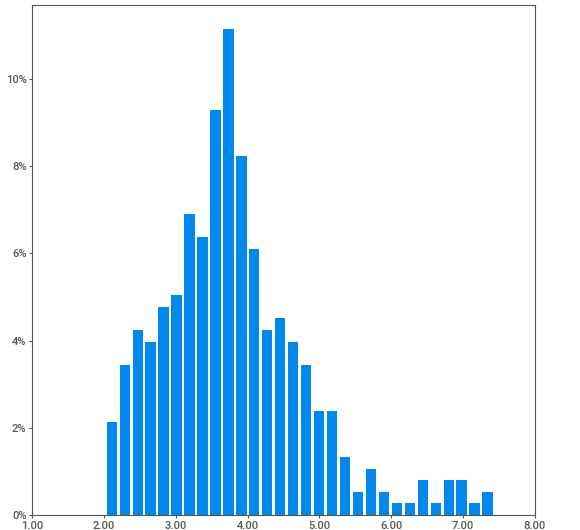
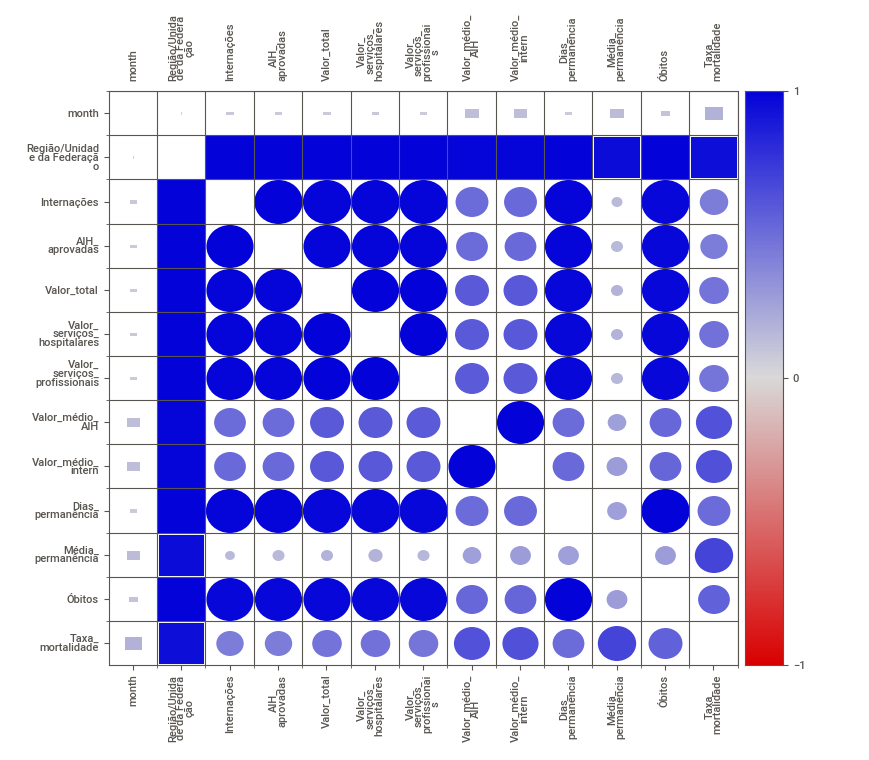
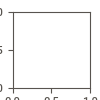

In [ ]:
#Sweetviz tem uma função chamada Analyze () que analisa todo o conjunto de dados e fornece um relatório detalhado com visualização.

my_report = sv.analyze(df)
my_report.show_notebook()

Acima temos o plot com a visualização dos valores missing nas variáveis e as primeiras informações do nosso dataset.

Vale notarmos que temos 4 variáveis do tipo "object" e que na verdade são do tipo "float", então vamos realizar a transformação desses dados:


In [ ]:
#Transformando os dados de object para float
df['Val_serv_hosp_-_compl_federal'] = df['Val_serv_hosp_-_compl_federal'].astype(float)
df['Val_serv_hosp_-_compl_gestor'] = df['Val_serv_hosp_-_compl_gestor'].astype(float)
df['Val_serv_prof_-_compl_federal'] = df['Val_serv_prof_-_compl_federal'].astype(float)
df['Val_serv_prof_-_compl_gestor'] = df['Val_serv_prof_-_compl_gestor'].astype(float)

Com os dados transformados, vamos fazer um último 'check' na validação do nosso conjunto de dados:

In [ ]:
# Validação da nossa base de dados
print('Quantidade de linhas:', df.shape[0])
print('Quantidade de colunas:', df.shape[1])
print('-' * 10)

print('Registros duplicados:', df.duplicated().any())
print('-' * 10)

print('Valores faltantes:', df.isnull().values.sum())
print('\n')
print('Registros únicos: \n\n', df.nunique())
print('-' * 10)

print('Quantidade de valores faltantes por coluna: \n')
for i in df.columns:
    nullNum = df[i].isnull().sum()
    nullRate = nullNum / len(df) * 100 
    if nullRate > 0:
        print(f"{i} {nullNum} ({nullRate:.2f}%)")

Quantidade de linhas: 377
Quantidade de colunas: 17
----------
Registros duplicados: False
----------
Valores faltantes: 1051


Registros únicos: 

 month                             14
Região/Unidade da Federação       27
Internações                      372
AIH_aprovadas                    374
Valor_total                      377
Valor_serviços_hospitalares      377
Val_serv_hosp_-_compl_federal    251
Val_serv_hosp_-_compl_gestor      70
Valor_serviços_profissionais     377
Val_serv_prof_-_compl_federal     70
Val_serv_prof_-_compl_gestor      61
Valor_médio_AIH                  376
Valor_médio_intern               375
Dias_permanência                 377
Média_permanência                 37
Óbitos                           346
Taxa_mortalidade                 233
dtype: int64
----------
Quantidade de valores faltantes por coluna: 

Val_serv_hosp_-_compl_federal 126 (33.42%)
Val_serv_hosp_-_compl_gestor 305 (80.90%)
Val_serv_prof_-_compl_federal 305 (80.90%)
Val_serv_prof_-_compl_ge

A princípio as informações podem parecer um pouco confusas, então, vamos esclarecer alguns pontos sobre isso começando pelas colunas com valores missing. Graças ao nosso plot e as primeiras impressões tiradas do nosso dataset, vimos que 4 variáveis apresentam valores missing, são elas:
- Val_serv_hosp_-_compl_federal (33.42%)
- Val_serv_hosp_-_compl_gestor (80.90%)
- Val_serv_prof_-_compl_federal (80.90%)
- Val_serv_prof_-_compl_gestor (83.55%)

Mesmo apresentando uma grande parte de valores missing vamos procurar aproveitar essas variáveis, acredito que informações deste tipo podem ser relevantes ao estudo que faremos e ao modelo que será treinado, portanto nenhuma variável será descartada.

Tirado nossas primeiras impressões do nosso conjunto de dados, bora começar a responder nossas perguntas!

**Terra da garoa x Qtd de internações**

---


Vamos ao nosso primeiro questionamento:

Em relação a São Paulo, como está a relação de Quantidade de internações por período?

De acordo com as informações do nosso conjunto de dados, nossa coluna "month" está como type "object", portanto para responder esse primeiro questionamento e para continuidade das nossas análises vamos transformar essa coluna em "datetime".

In [ ]:
#Transformando a coluna month de object para datetime
df.month = pd.to_datetime(df.month)

In [ ]:
#Criando plot de internações x período x estados

fig = px.line(df.sort_values(by=['month'], ascending=[True]), x='month', y='Internações', 
              line_group='Região/Unidade da Federação', color='Região/Unidade da Federação', 
              template='plotly_dark', title='Internações x Período x Estados', 
              labels={"Região/Unidade da Federação": "Estado"})
fig.update_xaxes(title_text='Período')
fig.update_yaxes(dtick=15000)
fig

Acima temos nosso gráfico de internações por período e segmentado por estados. 

A população por estados do Sudeste em 2018 estava em torno de:
- São Paulo: 45 milhões de habitantes
- MInas Gerais: 21 milhões de habitantes
- Rio de Janeiro: 16 milhões de habitantes
- Espírito Santo: 4 milhões de habitantes

Quando olhamos para nosso plot e temos esse dado dos habitantes, chega a ser natural que quanto maior a população de um estado, maior a quantidade de internações que ele terá, inclusive com São Paulo liderando o ranking.

Olhando para o eixo do tempo, notamos que nosso conjunto de dados está sem informações de alguns meses entre 2018 e 2019. Ainda assim, vamos dar uma olhada em São Paulo e ver se conseguimos visualizar uma curva mais suave e o comportamento de tendência dessas internações:

- **São Paulo**

Para este estudo vamos ficar só com a tendência de SP, ainda assim através do plot conseguimos analisar a tendência de internações dos 27 estados do Brasil. 

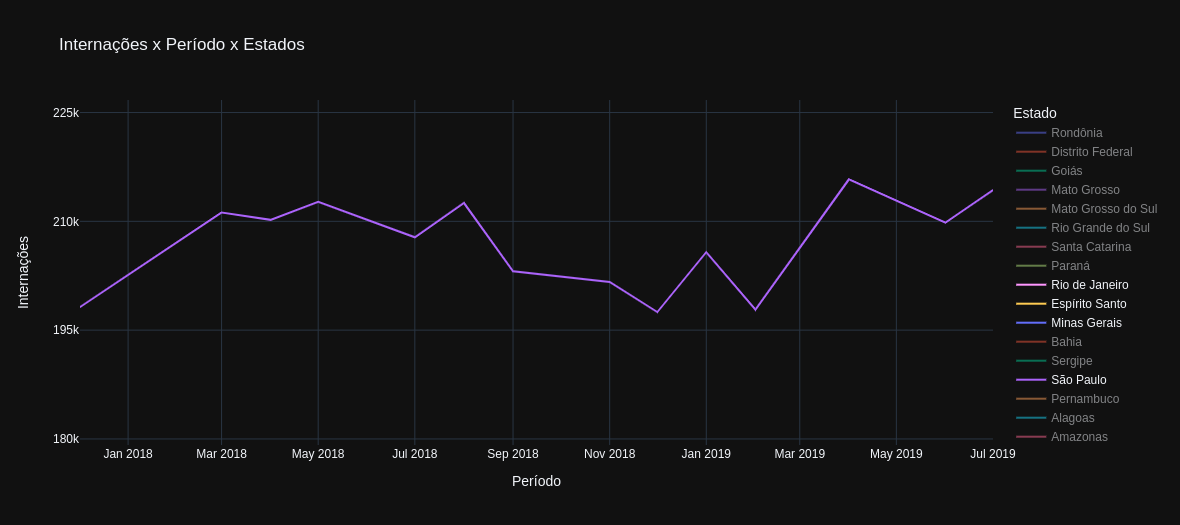

In [ ]:
'''Através do nosso plot conseguimos dar um zoom e analisar cada tendência, 
mas para não poluir nosso estudo com o mesmo código fiz o download da imagem'''

from PIL import Image

# Criando objeto
im = Image.open('SP.png')
im

Analisando com mais detalhes a linha de SP, notamos uma certa tendência ou comportamento. A quantidade de internações teve uma crescente de Dez/2017 até Ago/2018, após isso houve uma diminuição até o começo de 2019. Aparentemente em Abr/2019 seguimos com uma nova crescente, os dados faltantes do mês de Mar/2019 e Mai/2019 dificultam um pouco nossa análise.


De acordo com o site [rede brasil](https://www.redebrasilatual.com.br/saude-e-ciencia/2016/10/no-estado-de-sao-paulo-25-milhoes-de-pacientes-dependem-do-sus-1016/) a quantidade de pessoas que dependem exclusivamente do SUS em SP chega em torno de 25 milhões de pessoas, se pensarmos que a quantidade de internações **novas** estaria batendo em média a casa dos **200k por mês**, estaríamos falando que menos de 1% dessas pessoas seriam internadas pelo SUS e que a longo prazo essa porcentagem se tornaria algo assustador.

In [ ]:
#@title
from IPython.display import Image
Image(url='https://media.giphy.com/media/RJESXTC00P8iy4iklR/giphy.gif')

**Cidade dos anjos**

---
Após descobrirmos as tendências da quantidade de internações para o estado de SP na linha do tempo, vamos analisar a taxa de mortalidade e óbitos. Será que o estado de São Paulo lidera o ranking de novo?

In [ ]:
#Plot da quantidade de óbitos por estado

fig = px.histogram(df, x='Região/Unidade da Federação', y='Óbitos', template='ggplot2', title='Estados x Óbitos',histfunc='sum')
fig.update_xaxes(title_text='Estados')
fig.update_xaxes(categoryorder='total ascending')
fig.update_yaxes(title_text='Óbitos (Soma)')
fig.update_yaxes(dtick=20000)
fig

Como já era esperado São Paulo lidera o ranking na soma da quantidade de óbitos, seguido por Minas Gerais e Rio de Janeiro. Sua alta população reforça a teoria que quanto mais habitantes em um estado, mais casos de internações e consequentemente mais óbitos.

Em contrapartida, Amapá, Roraima e Acre são os estados que apresentam a menor quantidade de óbitos.


Agora vamos dar uma olhada na taxa de mortalidade, será que segue o mesmo ranking da quantidade de óbitos?

Para respondermos essa pergunta, estou afim de utilizar a média da taxa de mortalidade, então vamos realizar um agrupamento por estado em nosso conjunto de dados:

In [ ]:
#Criando novo dataframe (df2) com o agrupamento por estado

df2 = df.groupby(['Região/Unidade da Federação']).agg({col: ['mean'] for col in df.select_dtypes('number').columns})
df2.columns = ['_'.join(multi_index) for multi_index in df2.columns.ravel()]
df2 = df2.reset_index()

Feito isso, vamos ao nosso plot:

In [ ]:
#Plot taxa de mortalidade x estados

fig = px.histogram(df2, x='Região/Unidade da Federação', y='Taxa_mortalidade_mean', template='ggplot2', title='Taxa de mortalidade x Estados', histfunc='avg')
fig.update_xaxes(categoryorder='total ascending')
fig.update_yaxes(title_text='Taxa de mortalidade (Média)')
fig.update_xaxes(title_text='Estados')
fig

Aqui temos uma surpresa, o estado do Maranhão é o que apresenta a menor taxa de mortalidade dentre os demais, sendo que estava no top 12 dos que mais tem quantidade de óbitos.

Outra surpresa foi Sergipe, com um número relativamente baixo de óbitos comparado aos demais estados e aqui está no top 3 das maiores taxas de mortalidade.

Em relação a São Paulo, apesar de ser disparado o estado com mais quantidade de óbitos, aqui vimos que ele não entra no top 3 das maiores taxas de mortalidade.

Por fim, vale o alerta para o Rio de Janeiro! É disparado o estado com a maior taxa de mortalidade, seria relevante um estudo mais aprofundado com outras variáveis, tipo causa da doença por exemplo, para entendermos o motivo disso e posteriormente pensarmos numa ação para poder melhorar esse número.

**O último que sair paga a conta!**

---

Vamos ao nosso terceiro questionamento:

*Quanto mais dias de internação, maior é o valor dos serviços hospitalares?*

In [ ]:
#Plot Dias de internação x valor dos serviços hospitalares

fig = px.scatter(df, x='Valor_serviços_hospitalares', y='Dias_permanência', trendline='ols', trendline_color_override='red', 
                 title='Dias de internação x Valor serviços hospitalares', template='seaborn', 
                 color='Valor_total', color_continuous_scale='aggrnyl_r', labels={"Valor_total": "Valor Total"});
fig.update_yaxes(dtick=100000);
fig.update_xaxes(title_text='Valor dos serviços hospitalares');
fig.update_yaxes(title_text='Total de dias de internação');
fig

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



De acordo com nosso gráfico de dispersão acima, conseguimos ver uma crescente (Linha vermelha) entre as variáveis de dias de internação e valor dos serviços hospitalares.

Isso significa que quanto mais dias um paciente fica internado, maior é  valor gasto em serviços hospitalares.

De acordo com nossa legenda de calor, referente ao valor total, tem um grupo que está se distanciando consideravelmente dos demais, podemos observar quais são através do treemap:

In [ ]:
#plot distribuição do valor total por estado

fig = px.treemap(df, path=['Região/Unidade da Federação'], values='Valor_total', title='Distribuição do valor total por estado');
fig

Graças ao nosso treemap, conseguimos notar que aquele grupo afastado dos demais se trata dos estados de São Paulo, Minas Gerais e Paraná.

O alto investimento nos gastos do estado do Paraná pode ser que seja um dos motivos para apresentar uma menor taxa de mortalidade, em contrapartida aqui fica um alerta para Minas Gerais! 
É um estado que também está apresentando um alto investimento, mas é o segundo estado que mais apresenta quantidade de óbitos e possui uma taxa de mortalidade alta.

In [ ]:
#@title
from IPython.display import Image
Image(url='https://media.giphy.com/media/QrdaevtqHwgU6w0Aps/giphy.gif')

**Internação x Aprovação**

---

Por fim, vamos ao último questionamento:

Tivemos a mesma quantidade de internações e de AIH por período?

Para responder essa pergunta e darmos continuidade em nosso estudo, primeiro vamos transformar nossa coluna 'month' em nosso index:


In [ ]:
# Transformando nossa coluna month no index
df.set_index('month', inplace=True)

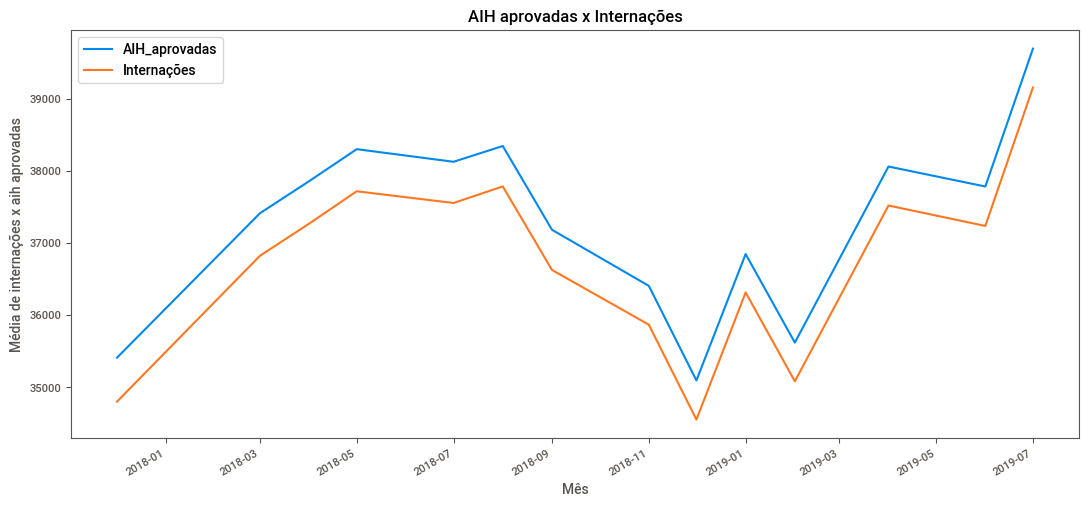

In [ ]:
#Plot de autorização internação hospitalar x internação

df.AIH_aprovadas.groupby(df.index).mean().plot(figsize=(13,6));
df.Internações.groupby(df.index).mean().plot(figsize=(13,6));
plt.title("AIH aprovadas x Internações");
plt.xlabel("Mês");
plt.ylabel("Média de internações x aih aprovadas");
plt.legend();

E a resposta da nossa pergunta é não! Não tivemos em nenhum período o mesmo número de aprovações e de internações, isso pode ser por n motivos e vale um estudo mais aprofundado, um desses motivos pode ser o estado crítico do paciente que teve sua internação aprovada, mas infelizmente veio a falecer antes.

Olhando nosso gráfico, vale o destaque para dois pontos:
- O começo do ano de 2018, onde tivemos uma diferença bem grande de aprovações e internações.
- O meio do ano de 2019, onde essa diferença de aprovações e internações diminuiu bastante em relação ao começo de 2018.




**Séries temporais & Machine Learning**

---
Feita nossas análises, vamos criar nosso modelo de machine learning.


Temos várias opções de estados na coluna "Região/Unidade da Federação". Para este estudo vamos focar no estado de São Paulo.

Portanto, vamos criar um novo dataframe chamado df1 contendo somente os dados associados ao estado de São Paulo.

In [ ]:
#Dataframe df1
df1 = df[df["Região/Unidade da Federação"] == 'São Paulo']
df1.drop('Região/Unidade da Federação', axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



E assim ficou nosso dataset:

In [ ]:
df1.head(5)

,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade
month,,,,,,,,,,,,,,,
2017-12-01,198083,204663,280080500.1,223504716.4,1790642.76,10034.58,53798330.40,10034.58,NaN,1368.50,1413.96,1155837,5.8,9893,4.99
2018-03-01,211205,217390,286775733.9,228103379.3,1959160.99,220.80,55727823.13,220.80,NaN,1319.18,1357.81,1164944,5.5,9868,4.67
2018-04-01,210204,216480,289711791.2,230899547.6,1719168.84,220.80,56080104.14,220.80,11188.20,1338.28,1378.24,1171452,5.6,9843,4.68
2018-05-01,212696,218845,293104281.7,233634140.1,1740050.06,NaN,56677950.23,NaN,9258.90,1339.32,1378.04,1186537,5.6,10349,4.87
2018-07-01,207804,213834,291524922.1,232636364.8,1994892.67,441.60,55656075.05,441.60,11959.74,1363.32,1402.88,1192725,5.7,11286,5.43


- **Valores missing**

Vimos que 4 das nossas variáveis apresentam valores missing, então vamos realizar o preenchimento com a média do valor da coluna:

In [ ]:
df1['Val_serv_hosp_-_compl_federal'].fillna(df1['Val_serv_hosp_-_compl_federal'].mean(),inplace=True)
df1['Val_serv_hosp_-_compl_gestor'].fillna(df1['Val_serv_hosp_-_compl_gestor'].mean(),inplace=True)
df1['Val_serv_prof_-_compl_federal'].fillna(df1['Val_serv_prof_-_compl_federal'].mean(),inplace=True)
df1['Val_serv_prof_-_compl_gestor'].fillna(df1['Val_serv_prof_-_compl_gestor'].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Através do df1.info conseguimos confirmar que não existe mais valor missing:

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2017-12-01 to 2019-07-01
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Internações                    14 non-null     int64  
 1   AIH_aprovadas                  14 non-null     int64  
 2   Valor_total                    14 non-null     float64
 3   Valor_serviços_hospitalares    14 non-null     float64
 4   Val_serv_hosp_-_compl_federal  14 non-null     float64
 5   Val_serv_hosp_-_compl_gestor   14 non-null     float64
 6   Valor_serviços_profissionais   14 non-null     float64
 7   Val_serv_prof_-_compl_federal  14 non-null     float64
 8   Val_serv_prof_-_compl_gestor   14 non-null     float64
 9   Valor_médio_AIH                14 non-null     float64
 10  Valor_médio_intern             14 non-null     float64
 11  Dias_permanência               14 non-null     int64  
 12  Média_permanência              1

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

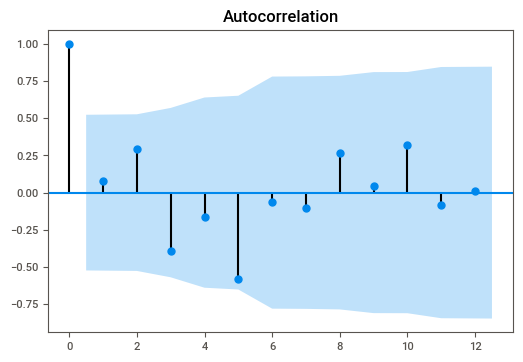

In [ ]:
plot_acf(df1.Internações)
plt.show()

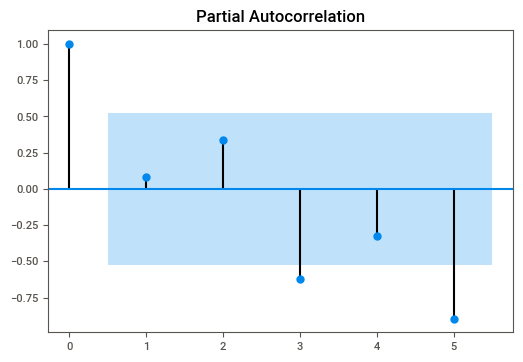

In [ ]:
plot_pacf(df1.Internações, lags=5, )
plt.show()

In [ ]:
df1.Internações

month
2017-12-01    198083
2018-03-01    211205
2018-04-01    210204
2018-05-01    212696
2018-07-01    207804
2018-08-01    212547
2018-09-01    203113
2018-11-01    201634
2018-12-01    197493
2019-01-01    205741
2019-02-01    197813
2019-04-01    215787
2019-06-01    209812
2019-07-01    214299
Name: Internações, dtype: int64

In [ ]:
p = 3
for i in range(p):
    df1[f'x_{i+1}'] = df1.Internações.shift(i + 1)
df1.dropna(axis=0, inplace=True)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,x_1,x_2,x_3
month,,,,,,,,,,,,,,,,,,
2018-05-01,212696,218845,293104281.7,233634140.1,1740050.06,1685.854286,56677950.23,1685.854286,9258.90,1339.32,1378.04,1186537,5.6,10349,4.87,210204.0,211205.0,198083.0
2018-07-01,207804,213834,291524922.1,232636364.8,1994892.67,441.600000,55656075.05,441.600000,11959.74,1363.32,1402.88,1192725,5.7,11286,5.43,212696.0,210204.0,211205.0
2018-08-01,212547,218516,298702204.6,238110129.9,2003872.40,110.400000,57463766.83,110.400000,11959.74,1366.96,1405.35,1183251,5.6,10807,5.08,207804.0,212696.0,210204.0
2018-09-01,203113,208957,282739086.8,225358518.5,1920404.14,1685.854286,54383584.18,1685.854286,13502.92,1353.10,1392.03,1131315,5.6,10327,5.08,212547.0,207804.0,212696.0
2018-11-01,201634,207524,283947815.4,225309335.7,3225164.41,331.200000,53715213.48,331.200000,11573.90,1368.26,1408.23,1120475,5.6,9929,4.92,203113.0,212547.0,207804.0


In [ ]:
X = df1.drop('Internações', axis=1)
y = df1.Internações

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X, y)

DecisionTreeRegressor()

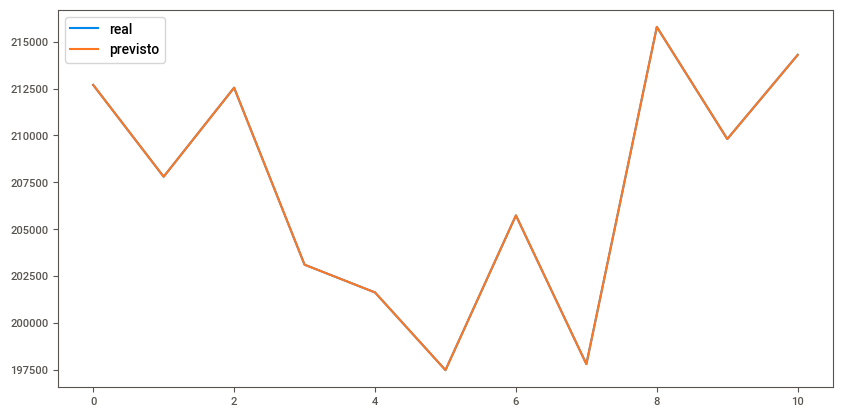

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df1.Internações.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

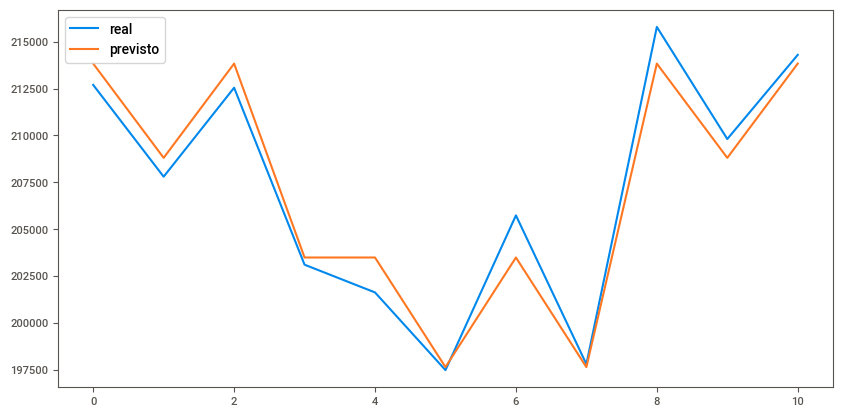

In [ ]:
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)
plt.figure(figsize=(10, 5))
plt.plot(df1.Internações.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

In [ ]:
train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X_train, y_train)

((y_test - reg.predict(X_test)) ** 2).mean()

15050276.375

In [ ]:
#!pip install lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [ ]:
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:01<00:00, 30.24it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LinearSVR,189.91,-880.58,209539.63,0.01
GaussianProcessRegressor,189.89,-880.47,209526.12,0.01
MLPRegressor,189.87,-880.38,209515.51,0.15
KernelRidge,184.00,-852.98,206234.13,0.01
PassiveAggressiveRegressor,177.52,-822.75,202550.73,0.01
SVR,1.27,-0.27,7961.86,0.01
LGBMRegressor,1.27,-0.26,7907.31,0.03
DummyRegressor,1.27,-0.26,7907.31,0.01
HistGradientBoostingRegressor,1.27,-0.26,7907.31,0.03


In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
tes = LinearSVR()
tes.fit(X_train, y_train)

((y_test - tes.predict(X_test)) ** 2).mean()

5569375.011270301

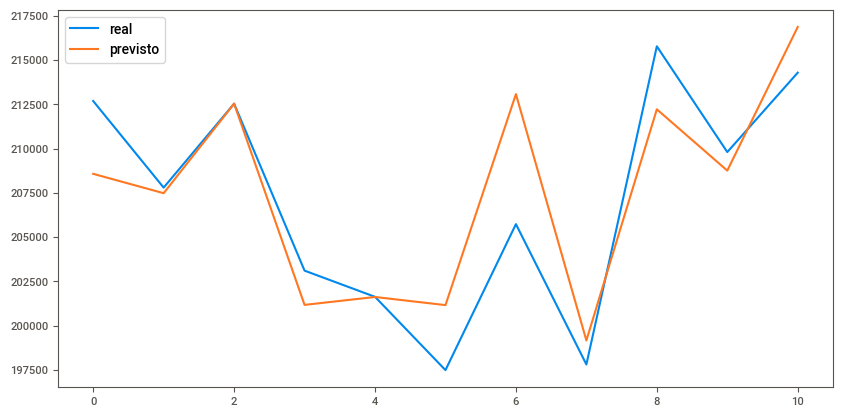

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df1.Internações.values)
plt.plot(tes.predict(X))
plt.legend(['real', 'previsto'])

In [ ]:
#!pip install --upgrade plotly